# **Import**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# **Import dataset**

In [3]:
df = pd.read_csv("salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


0 : no remote work, 
50 : Hybrid, 
100 : Full remote

# **Dataset analysis**

In [5]:
# Dimensions
df.shape

(151445, 11)

In [6]:
# Name and types of columns
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
# Missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Statistics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
#Column names
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# **Visualization**

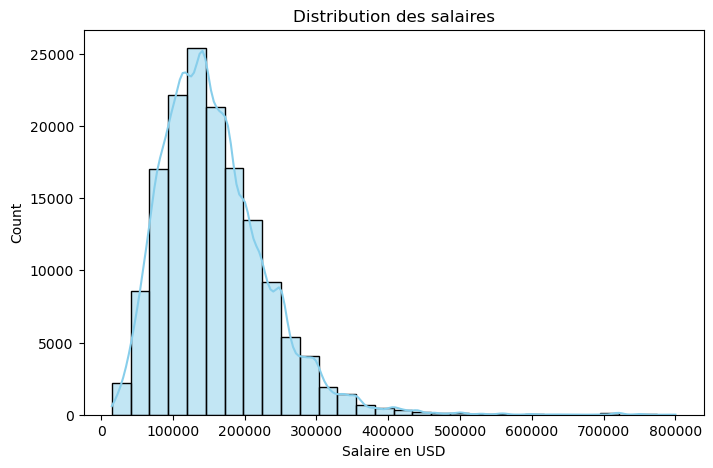

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title("Distribution des salaires")
plt.xlabel("Salaire en USD")
plt.show()

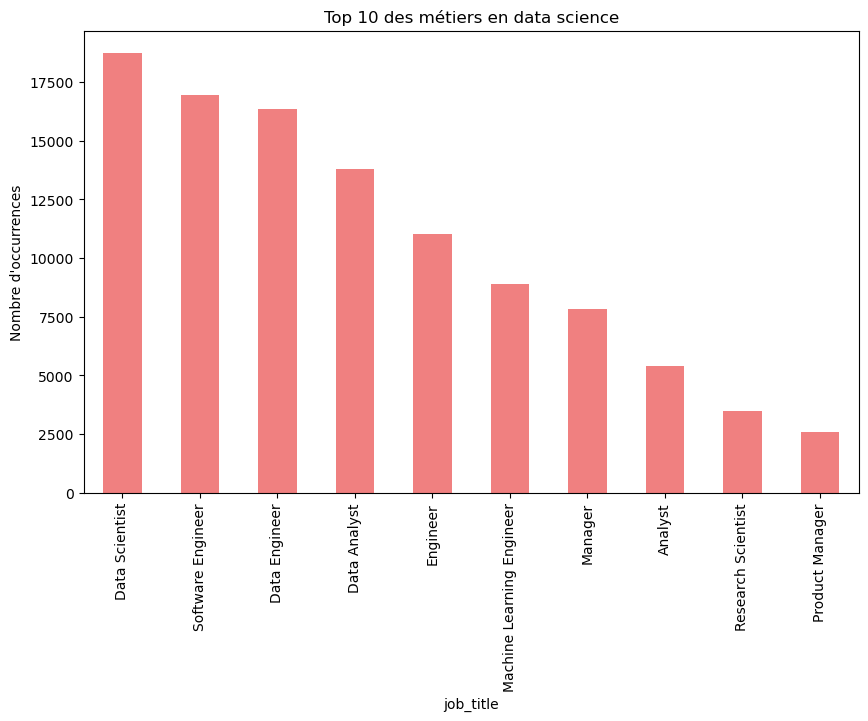

In [11]:
plt.figure(figsize=(10, 6))
df['job_title'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 des métiers en data science")
plt.ylabel("Nombre d'occurrences")
plt.show()

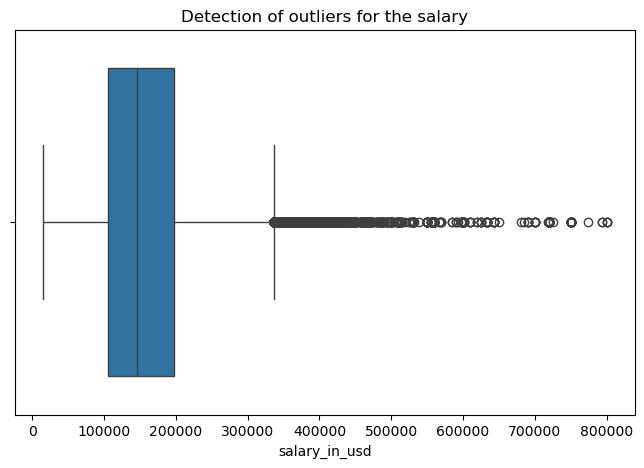

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Detection of outliers for the salary")
plt.show()

# **Duplicates**

In [13]:
df.duplicated().any()

np.True_

In [14]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(79532)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(71913, 11)

# **Encoding**

In [17]:
df['experience_level'] = df['experience_level'].map({
    'EN': 1,  # Entry-level / Junior
    'MI': 2,  # Mid-level / Intermediate
    'SE': 3,  # Senior-level
    'EX': 4   # Executive / Director
})

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,4,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,4,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,3,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,3,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,2,FT,Engineer,160000,USD,160000,US,100,US,M


In [19]:
df['company_size'] = df['company_size'].map({
    'S': 1,  # Small (1–50 employees)
    'M': 2,  # Medium (51–500 employees)
    'L': 3   # Large (501+ employees)
})

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,4,FT,Head of Data,348516,USD,348516,US,0,US,2
1,2025,4,FT,Head of Data,232344,USD,232344,US,0,US,2
2,2025,3,FT,Data Scientist,145400,USD,145400,US,0,US,2
3,2025,3,FT,Data Scientist,81600,USD,81600,US,0,US,2
4,2025,2,FT,Engineer,160000,USD,160000,US,100,US,2


In [21]:
job_counts = df['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

rare_jobs = job_counts[job_counts['count'] < 10]
print(rare_jobs)

                            job_title  count
230                     Web Developer      9
231                 Frontend Engineer      9
232         Data Integrity Specialist      9
233                      Data Analist      9
234                        Copywriter      9
..                                ...    ...
417  AI Software Development Engineer      1
418            Data Science Tech Lead      1
419     Quantitative Research Analyst      1
420          Principal Data Architect      1
421              Cloud Data Architect      1

[192 rows x 2 columns]


In [22]:
top_jobs = (df['job_title'].value_counts().head(15).index.tolist())
top_jobs

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Software Engineer',
 'Engineer',
 'Manager',
 'Machine Learning Engineer',
 'Analyst',
 'Research Scientist',
 'Analytics Engineer',
 'Product Manager',
 'Associate',
 'Data Architect',
 'AI Engineer',
 'Research Engineer']

In [23]:
import pandas as pd
from rapidfuzz import fuzz, process  

top_jobs = (df['job_title'].value_counts().head(30).index.tolist())

def normalize_job(title):
    match, score, _ = process.extractOne(title, top_jobs, scorer=fuzz.token_sort_ratio)
    if score >= 55:  
        return match
    else:
        return title  


df['job_title_clean'] = df['job_title'].apply(normalize_job)

job_counts = df['job_title_clean'].value_counts().reset_index()
job_counts.columns = ['job_title_clean', 'count']

rare_jobs = job_counts[job_counts['count'] < 10]

print(rare_jobs)

df['job_title_clean'].nunique()

                               job_title_clean  count
67                 Data Visualization Designer      9
68                                  Copywriter      9
69                                     Trainee      8
70                          Commercial Counsel      8
71                               Bear Robotics      8
72                        Quant Options Trader      8
73                Technical Support Specialist      7
74                           QA Tutor Reviewer      7
75                        Post Doctoral Fellow      7
76                          Head of Applied AI      6
77                                AI Tech Lead      5
78                             Psychometrician      4
79                               Clinical Aide      4
80                   Marketing Science Partner      4
81                  Conversational AI Designer      4
82                                 DevOps Lead      4
83                Postdoctoral Research Fellow      4
84                          

108

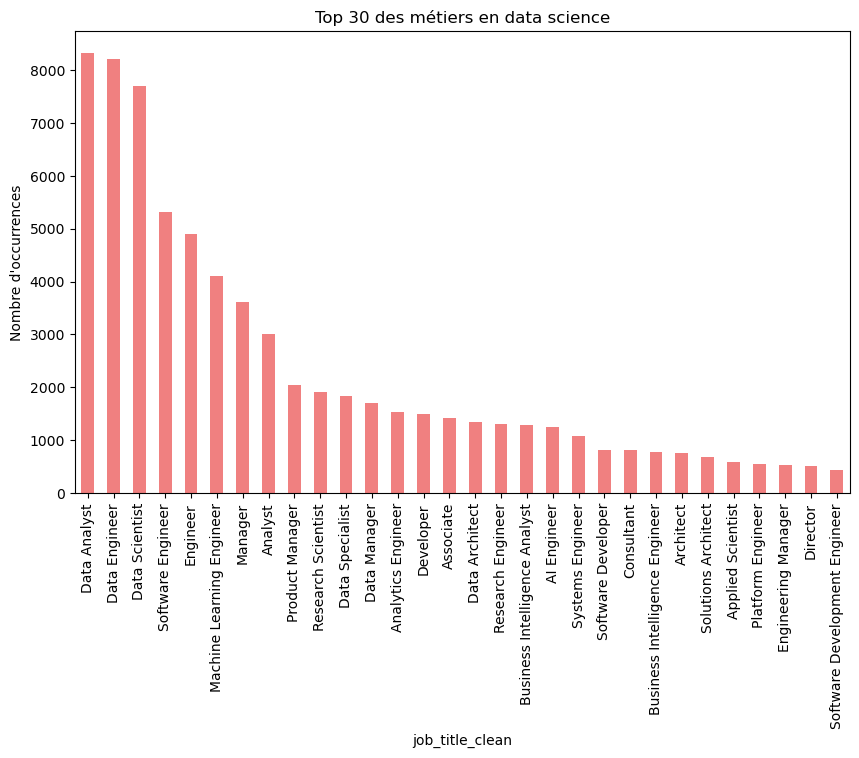

In [24]:
plt.figure(figsize=(10, 6))
df['job_title_clean'].value_counts().head(30).plot(kind='bar', color='lightcoral')
plt.title("Top 30 des métiers en data science")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [25]:
job_counts = df['job_title'].value_counts()

df = df[df['job_title'].isin(job_counts[job_counts >= 10].index)]

In [26]:
df['job_title_clean'].nunique()

67

In [27]:
#df = df.drop(columns=['job_title'])

In [28]:
df.shape

(71277, 12)

In [29]:
num_cols = ['work_year', 'experience_level', 'remote_ratio', 'company_size']
cat_cols = ['employment_type', 'company_location', 'employee_residence', 'job_title_clean']

In [30]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(
            handle_unknown='infrequent_if_exist',
            min_frequency=10,        # ajuste (ex. 5 si dataset plus petit)
            sparse_output=False
        ), cat_cols),
    ],
    remainder='drop'
)

In [31]:
df.dtypes

work_year              int64
experience_level       int64
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size           int64
job_title_clean       object
dtype: object

In [32]:
df.describe()

,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size
count,71277.000000,71277.000000,7.127700e+04,71277.000000,71277.000000,71277.000000
mean,2024.426715,2.492726,1.614963e+05,151414.542896,24.508607,2.018197
std,0.715847,0.741541,2.847655e+05,77321.443677,42.908805,0.151845
min,2020.000000,1.000000,1.400000e+04,15000.000000,0.000000,1.000000
25%,2024.000000,2.000000,9.664900e+04,96400.000000,0.000000,2.000000
50%,2025.000000,3.000000,1.400000e+05,139000.000000,0.000000,2.000000
75%,2025.000000,3.000000,1.924000e+05,190800.000000,0.000000,2.000000
max,2025.000000,4.000000,3.040000e+07,800000.000000,100.000000,3.000000


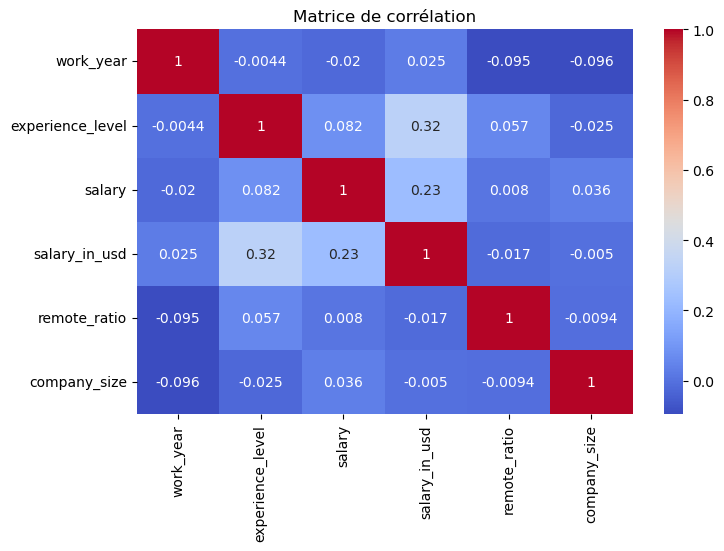

In [33]:
#heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# **Outliers**

In [34]:
from scipy import stats

z_scores = stats.zscore(df['salary_in_usd'])

df_no_outliers = df[abs(z_scores) < 3]  

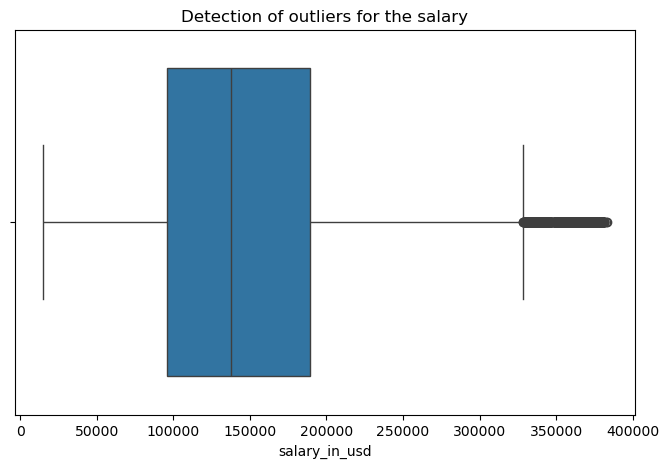

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['salary_in_usd'])
plt.title("Detection of outliers for the salary")
plt.show()

## **Formalisation of the problem**

The objective of this project is to develop a machine learning model capable of predicting employees salaries based on their professional and job-related characteristics. By analyzing features such as experience level, employment type, remote work ratio, company size, and job title, the model aims to capture the key factors that influence salary levels. The ultimate goal is to provide an accurate, data-driven tool that supports fair salary estimation and informed decision-making within the job market.

## **Model**

In [36]:
y= np.log(df_no_outliers['salary_in_usd'])
X = df_no_outliers[num_cols + cat_cols]

In [37]:
y.head()

0    12.761439
1    12.355974
2    11.887244
3    11.309585
4    11.982929
Name: salary_in_usd, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [39]:
# Imports modèles (assure-toi d'avoir installé xgboost, lightgbm, catboost)
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    'Linear': LinearRegression(),
    'ElasticNet': ElasticNet(
        alpha=0.01, l1_ratio=0.2, max_iter=10000, random_state=42
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=600, max_depth=None, min_samples_leaf=2,
        n_jobs=-1, random_state=42
    ),
    'HistGBR': HistGradientBoostingRegressor(
        learning_rate=0.06, max_leaf_nodes=31, min_samples_leaf=20,
        l2_regularization=1.0, random_state=42
    ),
    'SVR_RBF': SVR(C=10.0, epsilon=0.1, kernel='rbf', gamma='scale'),
    'MLP': MLPRegressor(
        hidden_layer_sizes=(128, 64),
        learning_rate_init=1e-3,
        max_iter=400,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=1500, learning_rate=0.05, max_depth=8,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        tree_method='hist', random_state=42, n_jobs=-1
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=1500, learning_rate=0.05, num_leaves=63,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1
    ),
    'CatBoost': CatBoostRegressor(
        depth=8, learning_rate=0.05, l2_leaf_reg=3.0, n_estimators=3000,
        loss_function='RMSE', eval_metric='RMSE', random_seed=42,
        od_type='Iter', od_wait=100, verbose=False
    ),
}

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocess),
        ('model', model),
    ])
    pipe.fit(X_train, y_train)
    y_pred = np.exp(pipe.predict(X_test))
    y_true = np.exp(y_test)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name:10s}  RMSE={rmse:,.0f}  MAE={mae:,.0f}  R²={r2:.3f}")

Linear      RMSE=37,371  MAE=26,578  R²=0.531
ElasticNet  RMSE=36,685  MAE=26,081  R²=0.548
RandomForest  RMSE=37,357  MAE=27,548  R²=0.531
HistGBR     RMSE=36,182  MAE=27,160  R²=0.560
SVR_RBF     RMSE=42,477  MAE=31,312  R²=0.394


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP         RMSE=43,036  MAE=34,331  R²=0.378
XGBoost     RMSE=41,978  MAE=30,982  R²=0.408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 314, number of used features: 14
[LightGBM] [Info] Start training from score 11.359160
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost    RMSE=41,506  MAE=30,389  R²=0.421


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingRegressor, BaggingRegressor, StackingRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)


grids = []


pipe_lin = Pipeline([('prep', preprocess), ('model', LinearRegression())])
grids.append(('Linear', pipe_lin, {}))


pipe_en = Pipeline([('prep', preprocess),
                    ('model', ElasticNet(max_iter=10000, random_state=42))])
param_en = {
    'model__alpha': [0.001, 0.003, 0.01, 0.03, 0.1],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.8],
}
grids.append(('ElasticNet', pipe_en, param_en))


pipe_rf = Pipeline([('prep', preprocess),
                    ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])
param_rf = {
    'model__n_estimators': [400, 800, 1200],
    'model__max_depth': [None, 12, 20],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 0.6, 1.0],
}
grids.append(('RandomForest', pipe_rf, param_rf))


pipe_hg = Pipeline([('prep', preprocess),
                    ('model', HistGradientBoostingRegressor(random_state=42))])
param_hg = {
    'model__learning_rate': [0.03, 0.06, 0.1],
    'model__max_leaf_nodes': [31, 63, 127],
    'model__min_samples_leaf': [10, 20, 40],
    'model__l2_regularization': [0.0, 0.5, 1.0],
}
grids.append(('HistGBR', pipe_hg, param_hg))


best_pipes = {}
cv_summary = []

for name, pipe, params in grids:
    gs = GridSearchCV(pipe, params, scoring=rmse_scorer, cv=cv, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    best_pipes[name] = gs.best_estimator_
    best_cv_rmse = -gs.best_score_
    cv_summary.append((name, best_cv_rmse, gs.best_params_))
    print(f"[CV best] {name}: RMSE={best_cv_rmse:,.0f} | params={gs.best_params_}")



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV best] Linear: RMSE=0 | params={}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV best] ElasticNet: RMSE=0 | params={'model__alpha': 0.003, 'model__l1_ratio': 0.8}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV best] RandomForest: RMSE=0 | params={'model__max_depth': 12, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 1200}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV best] HistGBR: RMSE=0 | params={'model__l2_regularization': 0.5, 'model__learning_rate': 0.1, 'model__max_leaf_nodes': 31, 'model__min_samples_leaf': 10}


In [ ]:
def eval_pipe(name, pipe):
    pipe.fit(X_train, y_train)
    y_pred = np.exp(pipe.predict(X_test))
    yt = np.exp(y_test)
    rmse = root_mean_squared_error(yt, y_pred)
    mae = mean_absolute_error(yt, y_pred)
    r2 = r2_score(yt, y_pred)
    print(f"{name:12s} RMSE={rmse:,.0f}  MAE={mae:,.0f}  R²={r2:.3f}")
    return rmse, mae, r2

print("\nTest set performance (meilleurs pipelines):")
test_scores = {}
for name, pipe in best_pipes.items():
    test_scores[name] = eval_pipe(name, pipe)




Test set performance (meilleurs pipelines):
Linear       RMSE=37,371  MAE=26,578  R²=0.531
ElasticNet   RMSE=36,368  MAE=25,892  R²=0.556
RandomForest RMSE=38,008  MAE=28,150  R²=0.515
HistGBR      RMSE=38,081  MAE=28,251  R²=0.513


In [ ]:
vote = VotingRegressor(estimators=[
    ('en', best_pipes['ElasticNet']),
    ('rf', best_pipes['RandomForest']),
    ('hgb', best_pipes['HistGBR']),
])


bag_en = Pipeline([
    ('prep', preprocess),
    ('bag', BaggingRegressor(
        estimator=ElasticNet(alpha=best_pipes['ElasticNet'].named_steps['model'].alpha,
                             l1_ratio=best_pipes['ElasticNet'].named_steps['model'].l1_ratio,
                             max_iter=10000, random_state=42),
        n_estimators=50, max_samples=0.8, bootstrap=True,
        n_jobs=-1, random_state=42
    ))
])

stack = StackingRegressor(
    estimators=[
        ('en', best_pipes['ElasticNet']),
        ('rf', best_pipes['RandomForest']),
        ('hgb', best_pipes['HistGBR'])
    ],
    final_estimator=LinearRegression(),
    passthrough=False,
    n_jobs=-1
)

print("\nEnsembles (test set):")
eval_pipe('Voting', vote)
eval_pipe('BaggingEN', bag_en)
eval_pipe('Stacking', stack)


Ensembles (test set):
Voting       RMSE=36,646  MAE=26,753  R²=0.549
BaggingEN    RMSE=36,672  MAE=26,105  R²=0.548
Stacking     RMSE=36,136  MAE=26,197  R²=0.561


(36136.11130147559, 26196.76856899497, 0.5612443268527877)

Exception ignored in: <function ResourceTracker.__del__ at 0x104769c60>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104139c60>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107915c60>
Traceback (most recent call last